#### Import Libraries 

In [1]:
#data manipulation
import numpy as np
import pandas as pd

#data viz
from tabulate import tabulate
import seaborn as sns
sns.despine()
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
plt.rc('figure',figsize = (22,10))


import warnings 
warnings.filterwarnings('ignore')

<Figure size 640x480 with 0 Axes>

#### Loading The Data

In [4]:
df = pd.read_csv('dataset/nigeria_houses_data.csv')

In [5]:
df.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6,5,5,4,Detached Duplex,Mabushi,Abuja,450000000
1,4,5,5,4,Terraced Duplexes,Katampe,Abuja,800000000
2,4,5,5,4,Detached Duplex,Lekki,Lagos,120000000
3,4,4,5,6,Detached Duplex,Ajah,Lagos,40000000
4,4,4,5,2,Semi Detached Duplex,Lekki,Lagos,75000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24326 entries, 0 to 24325
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   bedrooms       24326 non-null  int64 
 1   bathrooms      24326 non-null  int64 
 2   toilets        24326 non-null  int64 
 3   parking_space  24326 non-null  int64 
 4   title          24326 non-null  object
 5   town           24326 non-null  object
 6   state          24326 non-null  object
 7   price          24326 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 1.5+ MB


#### Cleaning Process

In [7]:
df.isnull().sum()

bedrooms         0
bathrooms        0
toilets          0
parking_space    0
title            0
town             0
state            0
price            0
dtype: int64

Inference: There are no missing values in the dataset.

#### Exploratory Data Analysis (EDA)

In the EDA phase, we will answer some questions outlined

1. How many states are covered in the dataset?

In [8]:
UniqueStates = df['state'].unique()
tableData = [[idx+1, value] for idx, value in enumerate(UniqueStates)]
print(tabulate(tableData, headers= ['No.','States'], tablefmt='fancy_grid'))
print('There are ' + str(df['state'].nunique()) + ' states covered out of the 36 Nigerian States ')

╒═══════╤═════════════╕
│   No. │ States      │
╞═══════╪═════════════╡
│     1 │ Abuja       │
├───────┼─────────────┤
│     2 │ Lagos       │
├───────┼─────────────┤
│     3 │ Edo         │
├───────┼─────────────┤
│     4 │ Ogun        │
├───────┼─────────────┤
│     5 │ Oyo         │
├───────┼─────────────┤
│     6 │ Imo         │
├───────┼─────────────┤
│     7 │ Anambara    │
├───────┼─────────────┤
│     8 │ Rivers      │
├───────┼─────────────┤
│     9 │ Enugu       │
├───────┼─────────────┤
│    10 │ Kaduna      │
├───────┼─────────────┤
│    11 │ Kwara       │
├───────┼─────────────┤
│    12 │ Nasarawa    │
├───────┼─────────────┤
│    13 │ Abia        │
├───────┼─────────────┤
│    14 │ Delta       │
├───────┼─────────────┤
│    15 │ Akwa Ibom   │
├───────┼─────────────┤
│    16 │ Osun        │
├───────┼─────────────┤
│    17 │ Ekiti       │
├───────┼─────────────┤
│    18 │ Cross River │
├───────┼─────────────┤
│    19 │ Kogi        │
├───────┼─────────────┤
│    20 │ Platea

2. What is the average price of homes in each state?

In [9]:
#we will now calculate the average price and group by state
AvgPriceByState = df.groupby('state')['price'].mean().reset_index()

#sort the values in descending order
AvgPriceByState = AvgPriceByState.sort_values(by='price', ascending=False)

'''The average values are large seeing as the prices are in millions
so it will be formatted to a more readable version'''

AvgPriceByState['Average Prices'] = AvgPriceByState['price'].apply('{:,.3f}'.format)
print('The average prices by state are as follows:')
print(tabulate(AvgPriceByState[['state','Average Prices']],
               headers=['State','Average Prices'], tablefmt='fancy_grid', showindex=False))

The average prices by state are as follows:
╒═════════════╤══════════════════╕
│ State       │ Average Prices   │
╞═════════════╪══════════════════╡
│ Lagos       │ 345,772,143.692  │
├─────────────┼──────────────────┤
│ Abuja       │ 227,924,610.523  │
├─────────────┼──────────────────┤
│ Rivers      │ 130,328,409.712  │
├─────────────┼──────────────────┤
│ Borno       │ 105,000,000.000  │
├─────────────┼──────────────────┤
│ Delta       │ 103,023,809.524  │
├─────────────┼──────────────────┤
│ Anambara    │ 94,652,665.510   │
├─────────────┼──────────────────┤
│ Abia        │ 92,222,222.222   │
├─────────────┼──────────────────┤
│ Bayelsa     │ 90,000,000.000   │
├─────────────┼──────────────────┤
│ Imo         │ 74,725,609.756   │
├─────────────┼──────────────────┤
│ Enugu       │ 66,559,765.625   │
├─────────────┼──────────────────┤
│ Ekiti       │ 54,888,888.889   │
├─────────────┼──────────────────┤
│ Edo         │ 49,970,000.000   │
├─────────────┼──────────────────┤
│ Akwa Ibom

#### Barplot Vizulaization for the AVG prices

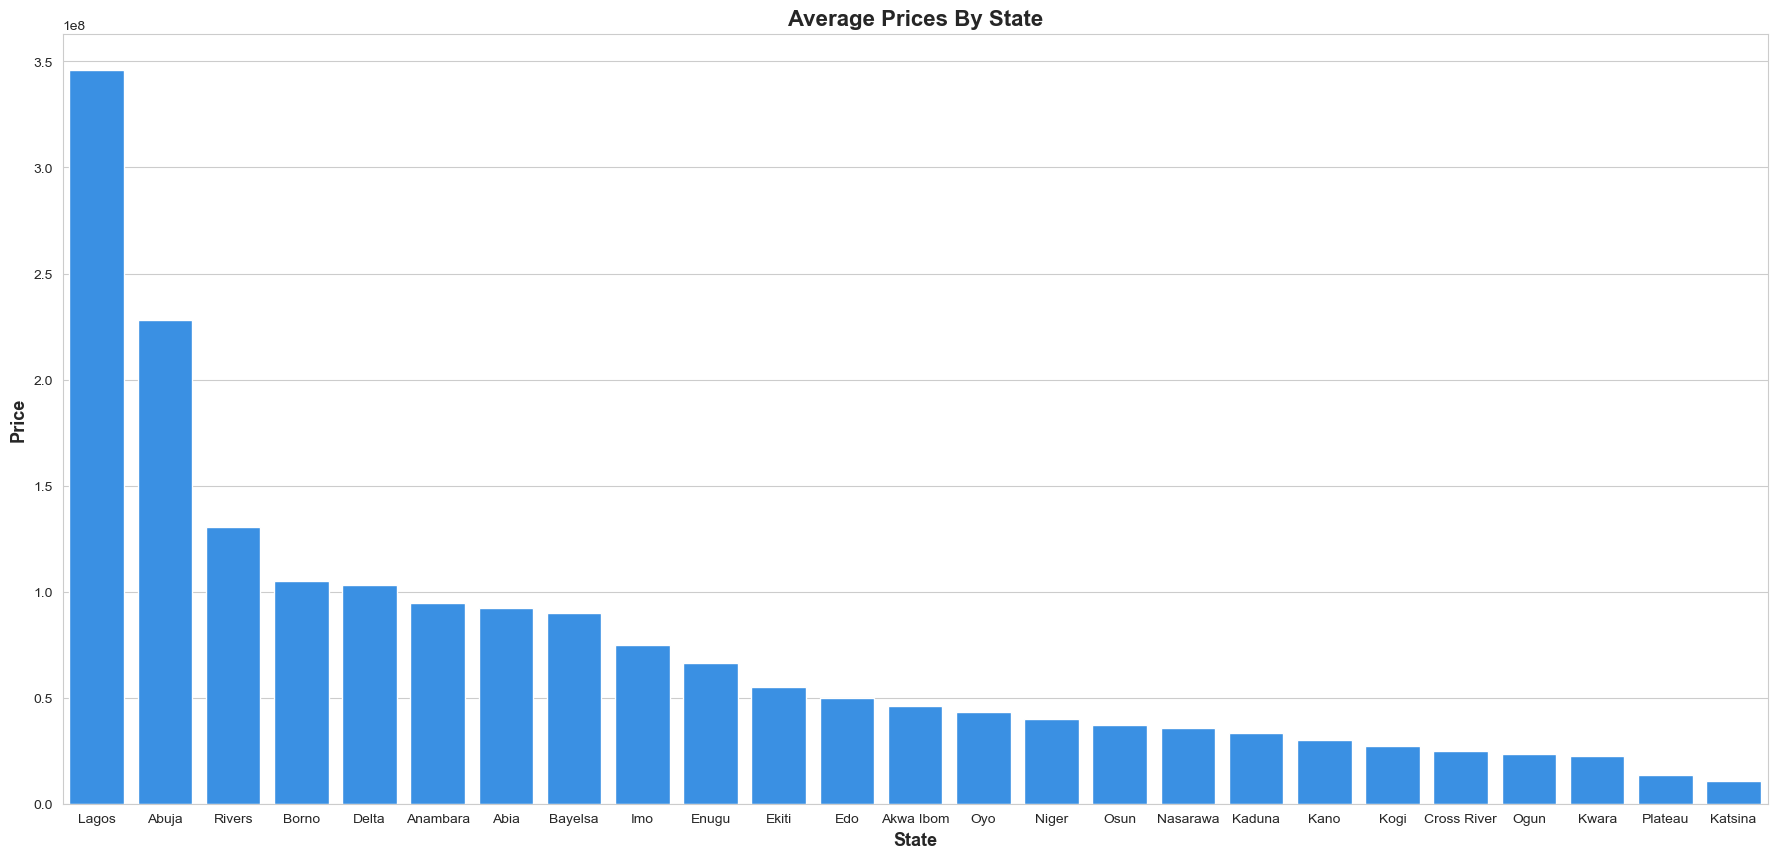

In [10]:
customColor = ['dodgerblue']
ax = sns.barplot(x='state', y='price', data=AvgPriceByState, palette=customColor)
plt.xlabel('State',fontweight = 'bold', fontsize =13)
plt.ylabel('Price', fontweight = 'bold', fontsize =13)
plt.title('Average Prices By State', fontweight='bold', fontsize = 16)
plt.show()

#### Inference: Lagos seems to be highest with an average of 345million which does sound absurd.

###### This might be a result of outliers residing in the dataset

###### To confirm if it is an outlier, I am going to visually represent the dataset using scatterplots

Since I want to confirm for outliers in Lagos, I will filter the location to gather only data from Lagos

##### Satterplots

In [11]:
lng = 'Lagos'
dataLocation = df[df['state'] == lng]

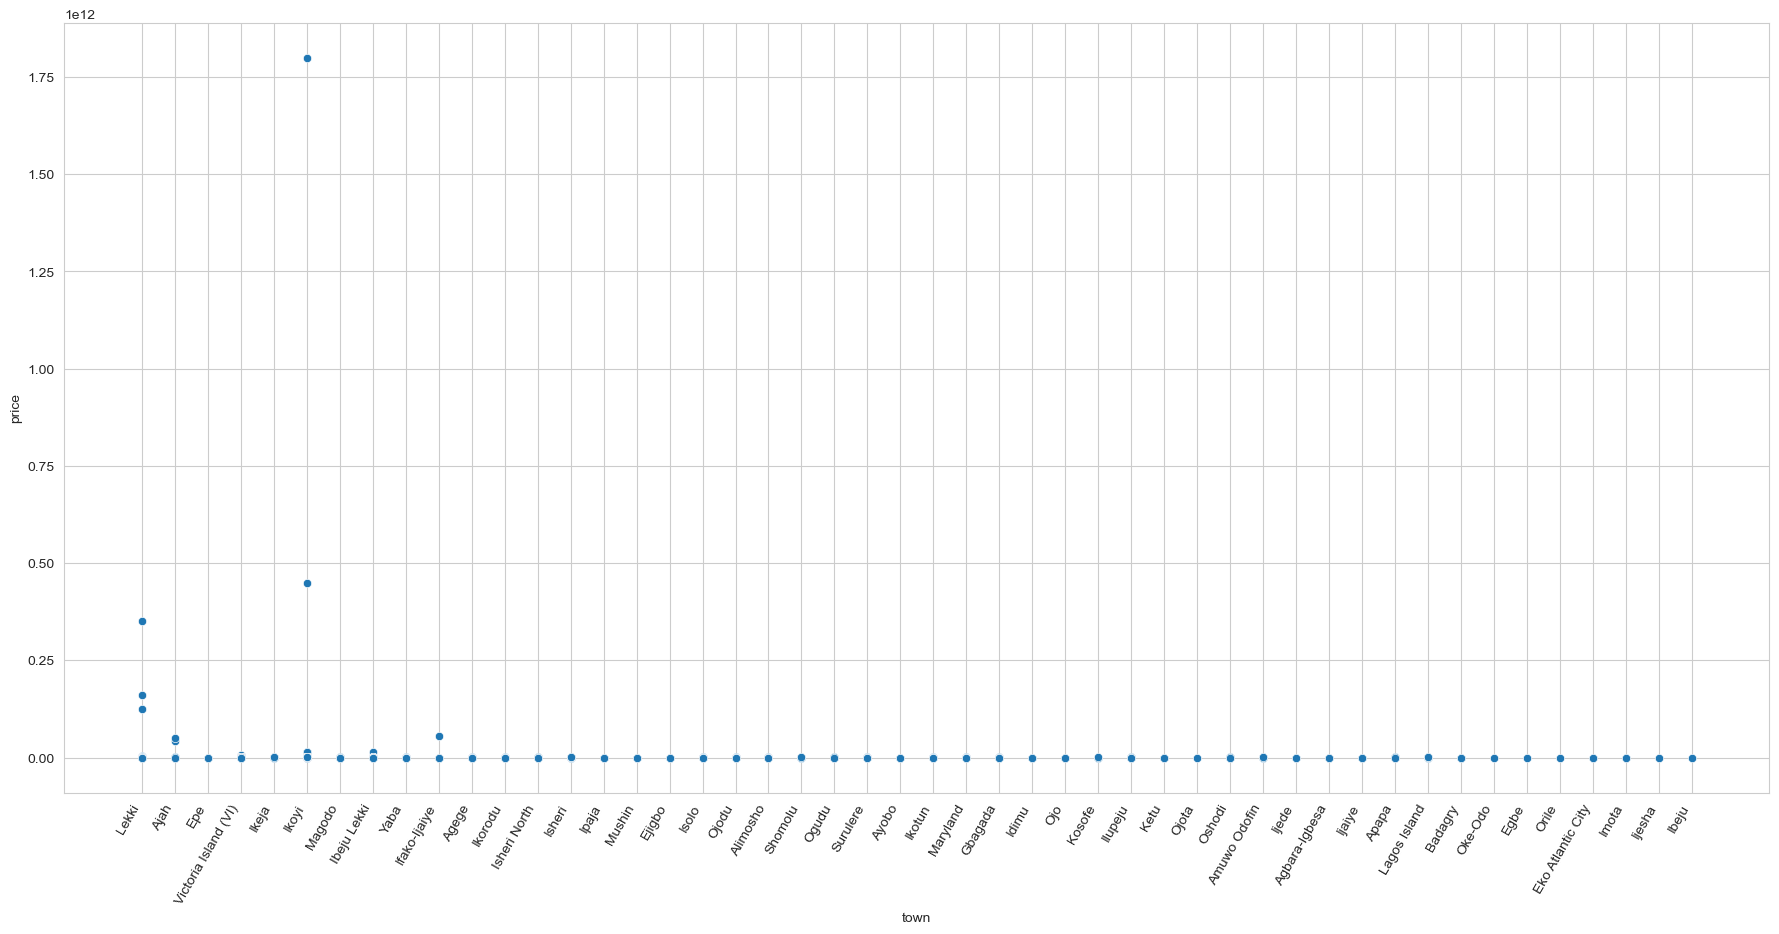

In [12]:
ax = sns.scatterplot(x='town', y='price', data=dataLocation)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 60, horizontalalignment='right')
plt.show()

With the scatterplot we have confirmed the outliers, although not all outliers are wrong and personally I do not think it is wrong although it seriously impacts the mean value of properties in Lagos. But for the sake of simplicity we are going to remove them.


In [13]:
q1, q9 = df['price'].quantile([0.15,0.90])
rem_df = df['price'].between(q1,q9)
newDf = df[rem_df]

In [14]:
 newDfCount = newDf['state'].value_counts()
newDfCount

Lagos        15039
Abuja         2594
Rivers         344
Oyo            231
Imo            198
Ogun           141
Enugu           97
Anambara        93
Edo             53
Delta           44
Akwa Ibom       13
Kaduna           8
Abia             6
Ekiti            5
Kogi             4
Nasarawa         4
Osun             3
Kwara            2
Borno            2
Bayelsa          1
Niger            1
Name: state, dtype: int64

In [15]:
validState = newDfCount[newDfCount >= 100].index.tolist()
newDF = newDf[newDf['state'].isin(validState)]


In [16]:
newDF['state'].value_counts()

Lagos     15039
Abuja      2594
Rivers      344
Oyo         231
Imo         198
Ogun        141
Name: state, dtype: int64

In [17]:
NewAvgState = newDF.groupby('state')['price'].mean().reset_index()
NewAvgState = NewAvgState.sort_values(by='price', ascending=False)

NewAvgState['Prices'] =NewAvgState['price'].apply('{:,.3f}'.format)
print('The House Price Averages By State are as follows: ')
print(tabulate(NewAvgState[['state','Prices']], headers=['state','Prices'], tablefmt='fancy_grid',showindex=False))

The House Price Averages By State are as follows: 
╒═════════╤═════════════════╕
│ state   │ Prices          │
╞═════════╪═════════════════╡
│ Lagos   │ 121,287,935.269 │
├─────────┼─────────────────┤
│ Abuja   │ 110,819,129.394 │
├─────────┼─────────────────┤
│ Rivers  │ 90,162,249.744  │
├─────────┼─────────────────┤
│ Imo     │ 87,621,212.121  │
├─────────┼─────────────────┤
│ Oyo     │ 71,748,917.749  │
├─────────┼─────────────────┤
│ Ogun    │ 55,187,943.262  │
╘═════════╧═════════════════╛


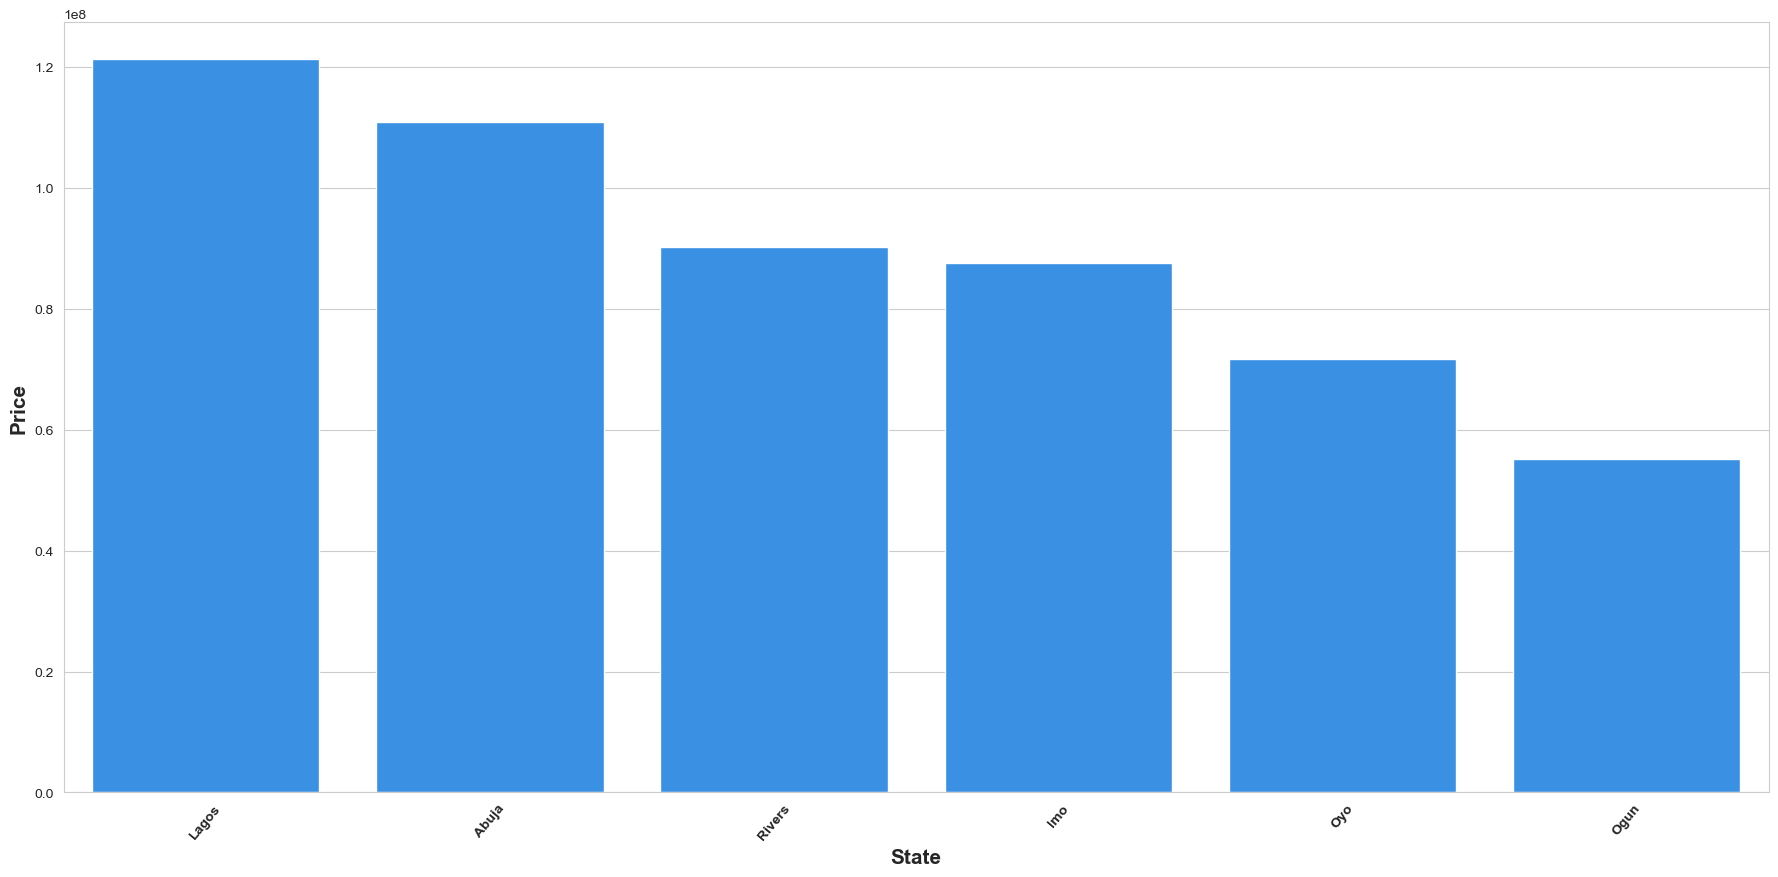

In [50]:
ax = sns.barplot(x='state', y='price', data=NewAvgState, palette=customColor)
ax.set_xticklabels(ax.get_xticklabels(),rotation= 50, fontweight='bold')
plt.xlabel('State', fontweight = 'bold', fontsize = 15)
plt.ylabel('Price', fontweight = 'bold', fontsize = 15)
plt.show()

##### Let us try the Average again

3. How many types of homes are on the market?

In [19]:
UniqueHomes = df['title'].unique()
homeTable = [[idx+1, values] for idx, values in enumerate(UniqueHomes)]
print(tabulate(homeTable, headers=['No.', 'Home Types'],tablefmt='fancy_grid'))

print('Above are the ' +  str(df['title'].nunique()) +' different types of homes in the market')

╒═══════╤════════════════════════╕
│   No. │ Home Types             │
╞═══════╪════════════════════════╡
│     1 │ Detached Duplex        │
├───────┼────────────────────────┤
│     2 │ Terraced Duplexes      │
├───────┼────────────────────────┤
│     3 │ Semi Detached Duplex   │
├───────┼────────────────────────┤
│     4 │ Detached Bungalow      │
├───────┼────────────────────────┤
│     5 │ Block of Flats         │
├───────┼────────────────────────┤
│     6 │ Semi Detached Bungalow │
├───────┼────────────────────────┤
│     7 │ Terraced Bungalow      │
╘═══════╧════════════════════════╛
Above are the 7 different types of homes in the market


4. What property type is the most common in the market?

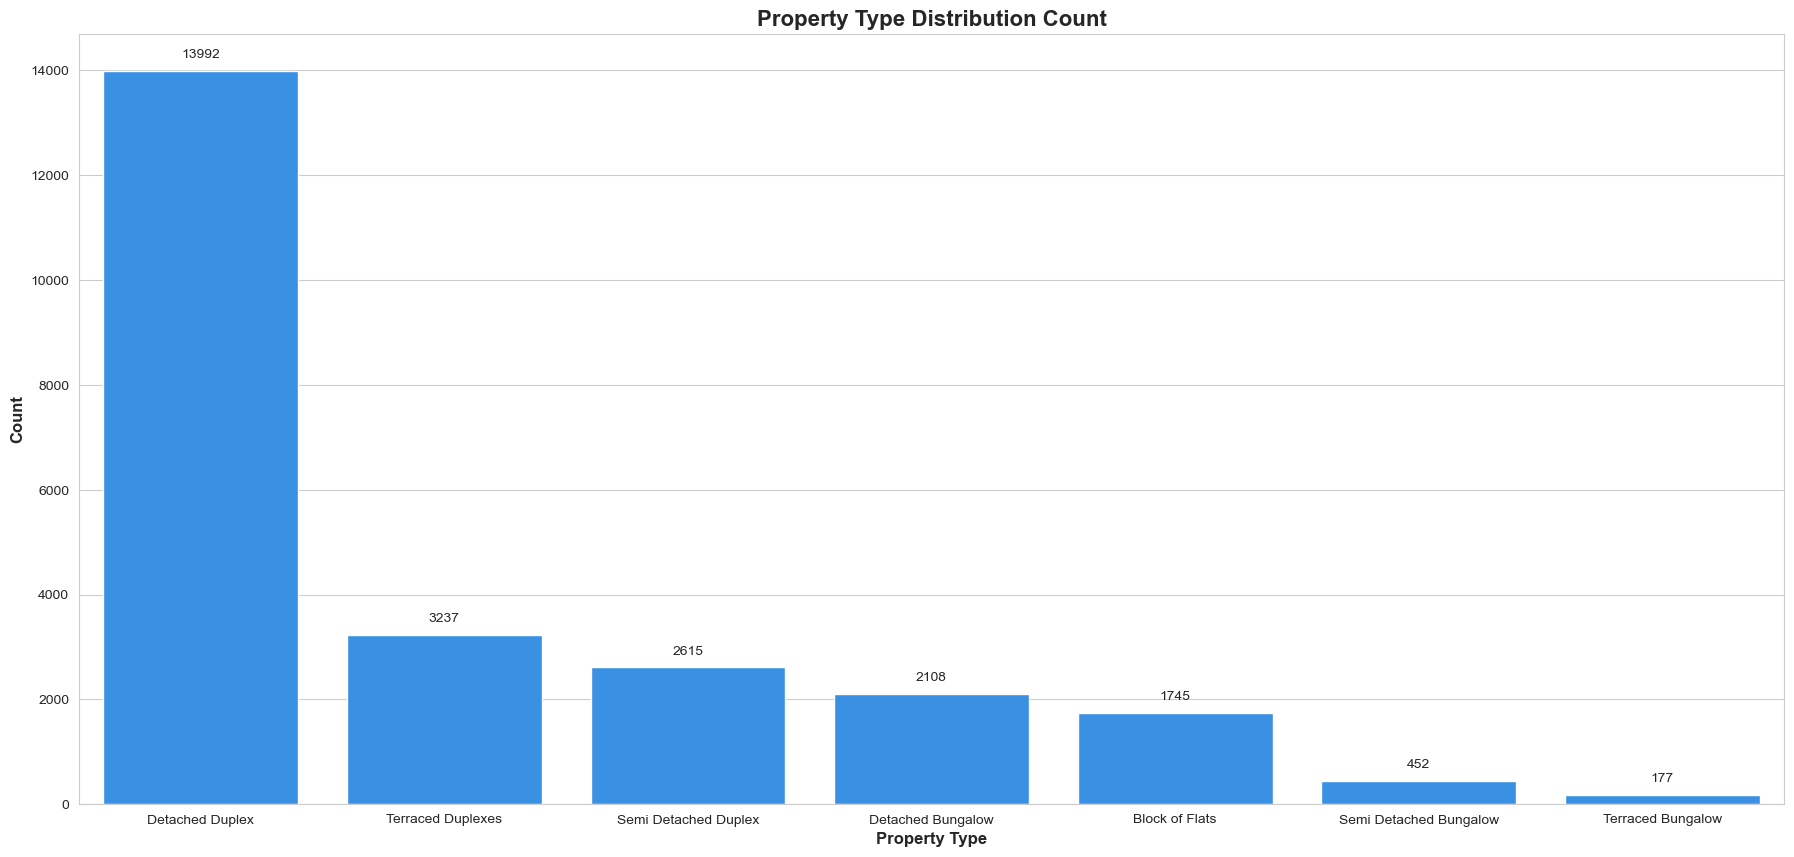

In [20]:
ax= sns.countplot(x=df['title'], data=df, palette=customColor)

plt.xlabel('Property Type', fontsize = 12, fontweight ='bold')
plt.ylabel('Count', fontsize = 12, fontweight ='bold')
plt.title('Property Type Distribution Count', fontsize = 16, fontweight ='bold')

for bars in ax.patches:
    x_value = bars.get_x() + bars.get_width() / 2
    y_value = bars.get_height() + 300 # Adjust this value to move the label up
    count = int(bars.get_height())  # Convert count to integer
    ax.annotate(f'{count}', (x_value, y_value), horizontalalignment ='center', verticalalignment='center')
plt.show()

Inference: The detached duplex home type has the highest count in the dataset which suggests that this is the most common and sought after home in Nigeria

5. What property type is the most common in Lagos, Abuja and Rivers?

First I will filter the dataset to bring only results from these three states and store them in variables i will use to plot vizualizations

In [21]:
lag = 'Lagos'
LagosProperty = df[df['state'] == lag]

abj = 'Abuja'
AbujaProperty = df[df['state'] == abj]

riv = 'Rivers'
RiversProperty = df[df['state'] == riv]

### LAGOS HOUSE TYPE

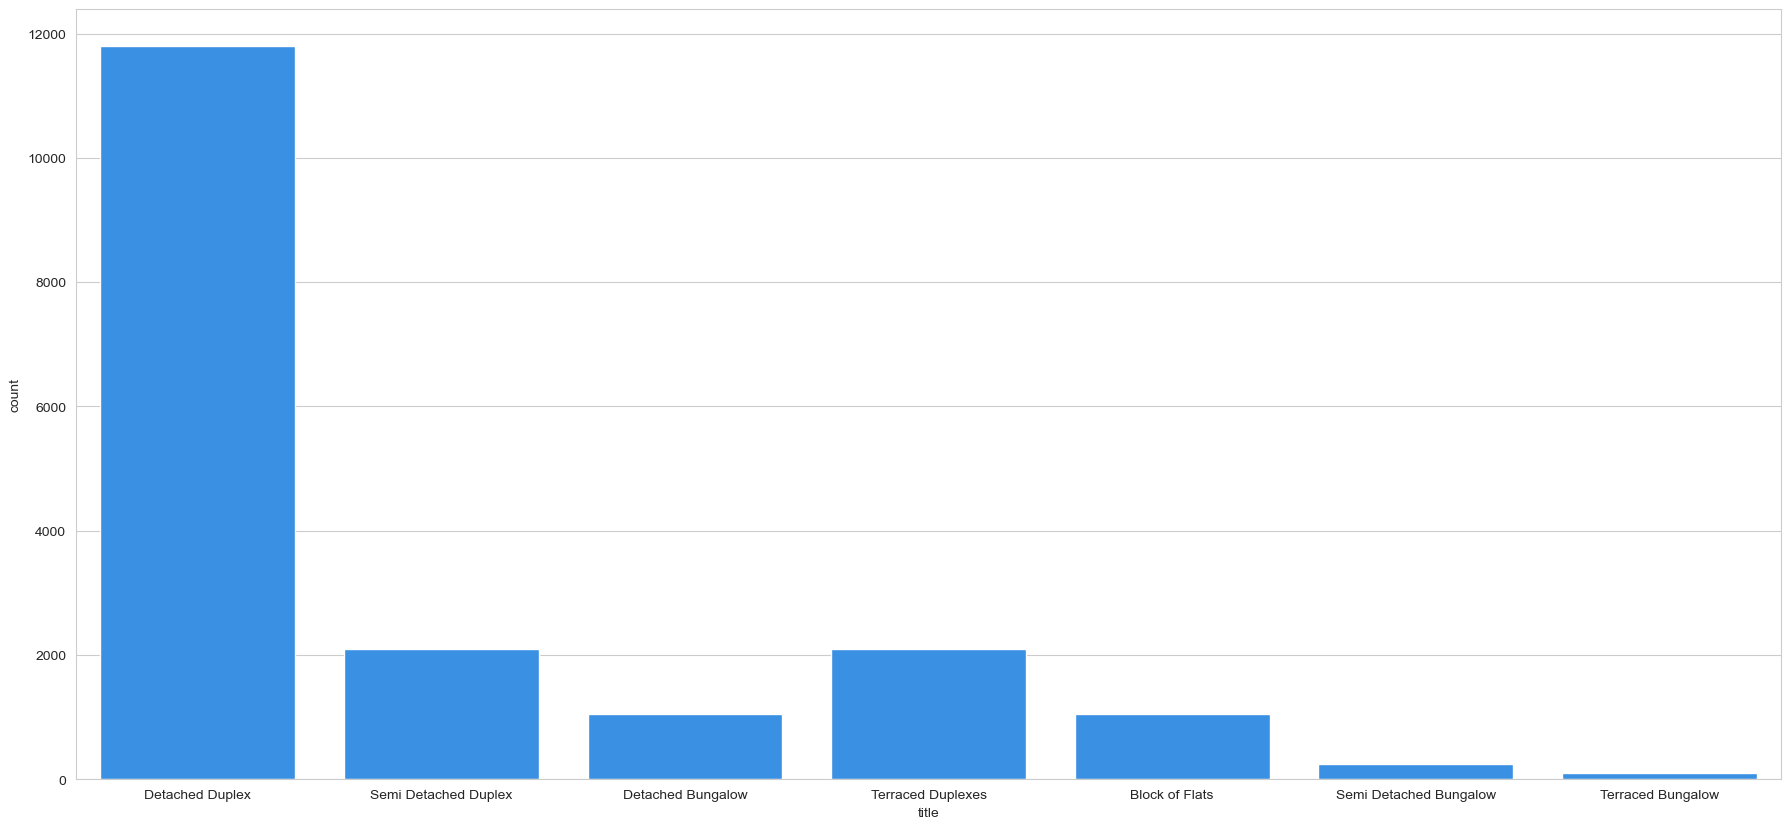

In [22]:
sns.countplot(x=LagosProperty['title'], data=LagosProperty, palette=customColor)
plt.show()

### ABUJA HOUSE TYPE

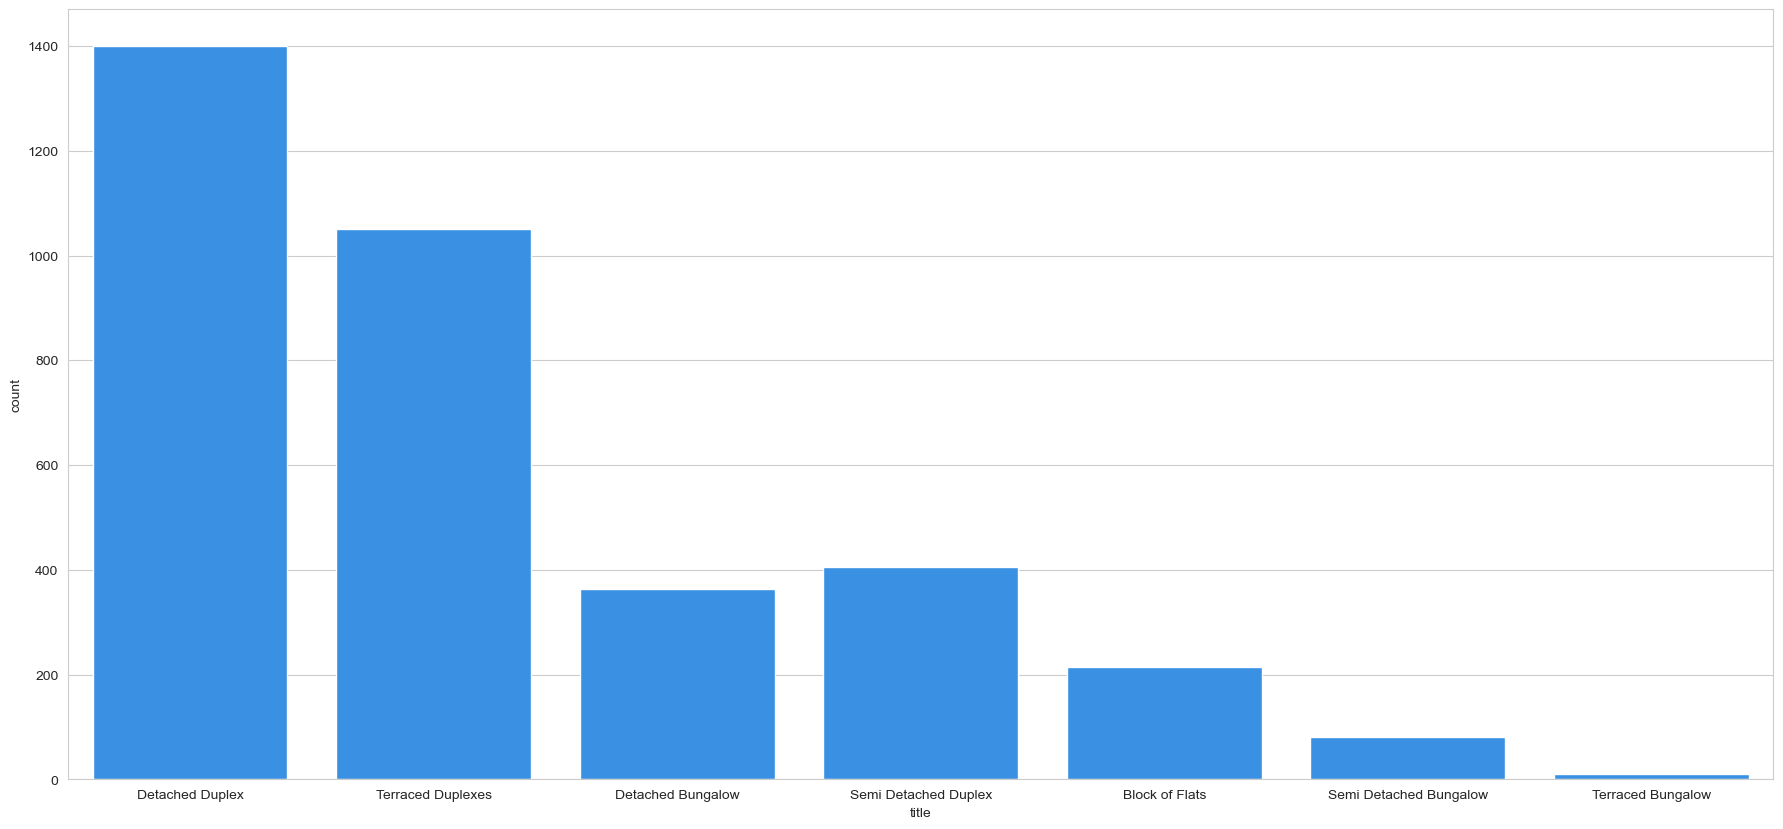

In [23]:
sns.countplot(x=AbujaProperty['title'], data=AbujaProperty, palette=customColor)
plt.show()

### RIVERS HOUSE TYPE

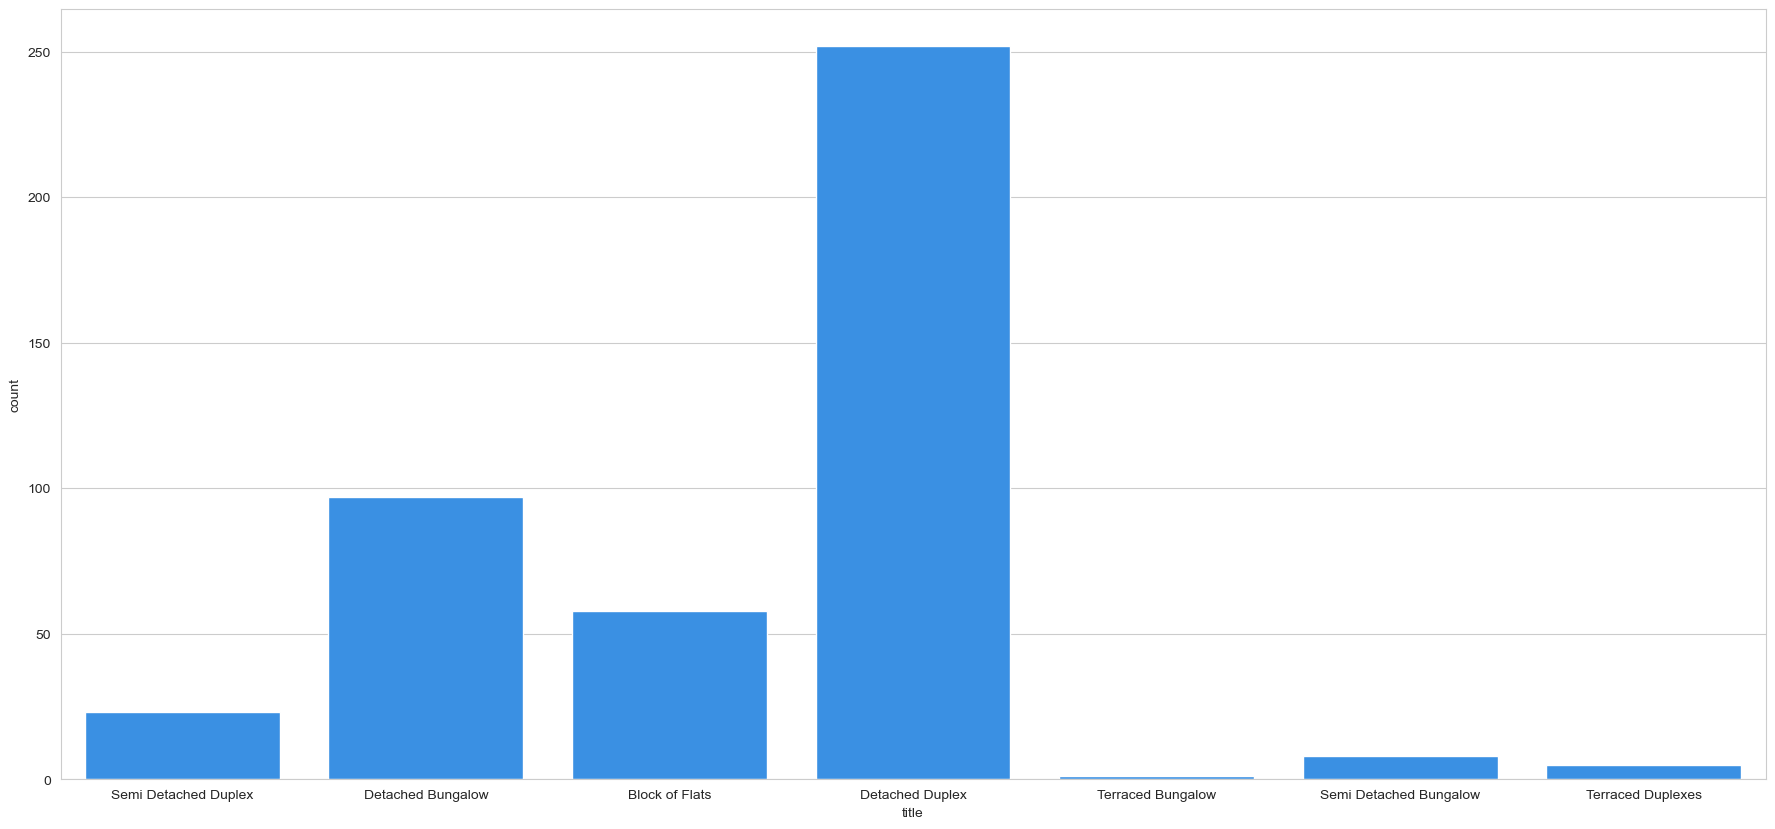

In [24]:
sns.countplot(x=RiversProperty['title'], data=RiversProperty, palette=customColor)
plt.show()

6. How many homes are available in each state?

count all the types and group by state

In [25]:
StateCount = df['state'].value_counts()
StateCount

Lagos          18445
Abuja           3524
Ogun             637
Oyo              477
Rivers           444
Imo              246
Anambara         145
Enugu            128
Edo              100
Delta             63
Akwa Ibom         25
Kaduna            23
Osun              12
Ekiti              9
Abia               9
Nasarawa           9
Kwara              9
Kogi               8
Cross River        2
Plateau            2
Kano               2
Katsina            2
Bayelsa            2
Borno              2
Niger              1
Name: state, dtype: int64

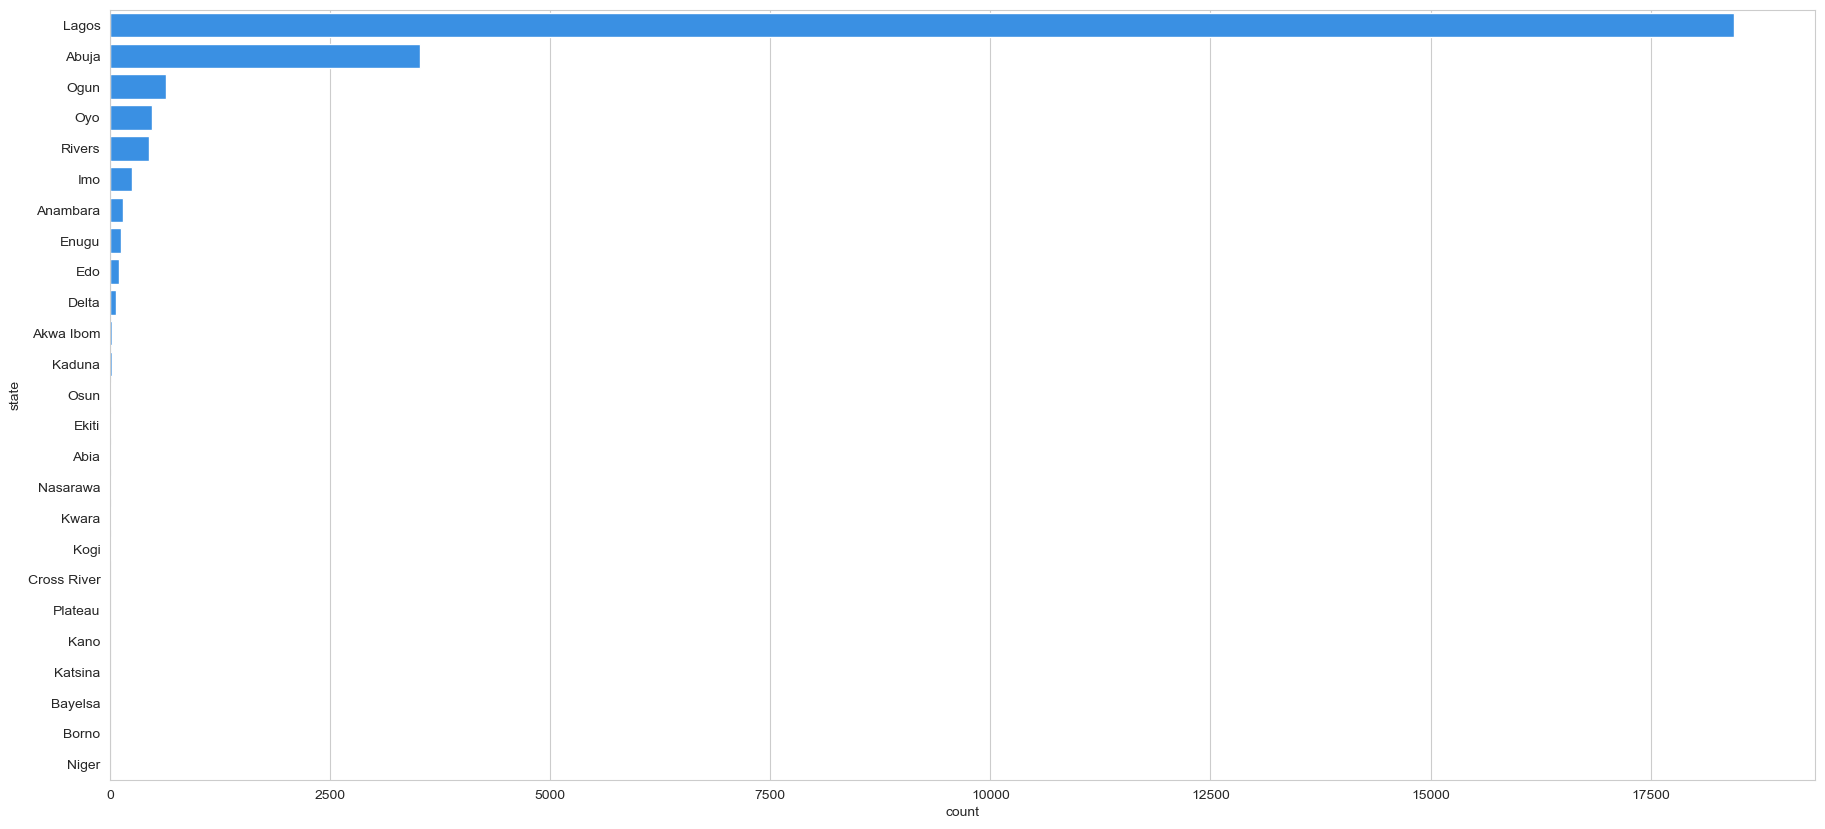

In [26]:
StatePlot = sns.countplot(y=df['state'], data=df, palette=customColor, order = df['state'].value_counts().index)

7. What is the Average Price by House Type in Lagos, Rivers And Abuja

### LAGOS AVERAGES

In [39]:
LagAVG = newDF[newDF['state'] == lag]
LagAVG = LagAVG.groupby('title')['price'].mean().reset_index()
LagAVG = LagAVG.sort_values(by='price', ascending=False)


LagAVG['Prices'] = LagAVG['price'].apply('{:,.3f}'.format)

print(tabulate(LagAVG[['title','Prices']], headers =['House Type','Price'], tablefmt='fancy_grid',showindex=False))


╒════════════════════════╤═════════════════╕
│ House Type             │ Price           │
╞════════════════════════╪═════════════════╡
│ Detached Duplex        │ 137,215,035.132 │
├────────────────────────┼─────────────────┤
│ Semi Detached Duplex   │ 93,572,821.338  │
├────────────────────────┼─────────────────┤
│ Terraced Duplexes      │ 89,398,818.910  │
├────────────────────────┼─────────────────┤
│ Block of Flats         │ 86,596,799.361  │
├────────────────────────┼─────────────────┤
│ Semi Detached Bungalow │ 84,758,064.516  │
├────────────────────────┼─────────────────┤
│ Terraced Bungalow      │ 81,001,586.957  │
├────────────────────────┼─────────────────┤
│ Detached Bungalow      │ 60,640,372.671  │
╘════════════════════════╧═════════════════╛


### ABUJA AVERAGES

In [40]:
AbjAVG = newDF[newDF['state'] == abj]
AbjAVG = AbjAVG.groupby('title')['price'].mean().reset_index()
AbjAVG = AbjAVG.sort_values(by='price', ascending=False)

AbjAVG['Prices'] = AbjAVG['price'].apply('{:,.3f}'.format)

print(tabulate(AbjAVG[['title','Prices']], headers=['House Type','Prices'], tablefmt='fancy_grid', showindex= False))

╒════════════════════════╤═════════════════╕
│ House Type             │ Prices          │
╞════════════════════════╪═════════════════╡
│ Detached Duplex        │ 147,513,426.801 │
├────────────────────────┼─────────────────┤
│ Block of Flats         │ 120,736,866.766 │
├────────────────────────┼─────────────────┤
│ Semi Detached Duplex   │ 109,017,977.327 │
├────────────────────────┼─────────────────┤
│ Terraced Duplexes      │ 82,737,490.927  │
├────────────────────────┼─────────────────┤
│ Terraced Bungalow      │ 77,500,000.000  │
├────────────────────────┼─────────────────┤
│ Semi Detached Bungalow │ 71,157,894.737  │
├────────────────────────┼─────────────────┤
│ Detached Bungalow      │ 54,312,500.000  │
╘════════════════════════╧═════════════════╛


### RIVERS AVERAGES

In [48]:
RvAVG = newDF[newDF['state'] == riv]
RvAVG = RvAVG.groupby('title')['price'].mean().reset_index()
RvAVG = RvAVG.sort_values(by='price', ascending =False)

RvAVG['Prices'] = RvAVG['price'].apply('{:,.3f}'.format)

print(tabulate(RvAVG[['title','Prices']], headers =['House Type','Price'], tablefmt='fancy_grid',showindex=False))

╒════════════════════════╤════════════════╕
│ House Type             │ Price          │
╞════════════════════════╪════════════════╡
│ Detached Duplex        │ 99,887,613.356 │
├────────────────────────┼────────────────┤
│ Semi Detached Bungalow │ 97,500,000.000 │
├────────────────────────┼────────────────┤
│ Block of Flats         │ 91,875,000.000 │
├────────────────────────┼────────────────┤
│ Terraced Duplexes      │ 91,250,000.000 │
├────────────────────────┼────────────────┤
│ Semi Detached Duplex   │ 70,950,000.000 │
├────────────────────────┼────────────────┤
│ Detached Bungalow      │ 46,400,000.000 │
╘════════════════════════╧════════════════╛
